LENDING CLUB BACKGROUND
Lending Club is a peer-to-peer (P2P) lending platform, where borrowers submit their loan applications and individual lenders select the applications that they want to fund. Borrowers receive the full amount of the issued loan minus the origination fee, which is paid to the company. Investors purchase notes backed by the personal loans and pay Lending Club a service fee.

P2P lending brings down the cost of personal loans compared to traditional financing by connecting the borrowers and investors directly. However, there is always a risk of investing in a bad loan. In fact, the default rate for P2P loans are much higher than that of traditional loans. Therefore, the lending industry is highly interested in providing the investors with comprehensive risk assessment of the loan applications. The company shares data about all loan applications made through its platform. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text
from IPython.display import Image
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc, average_precision_score

In [2]:
train = pd.read_excel('lendingclub_traindata.xlsx')
# 1 = good, 0 = default
print(train.head())

   home_ownership  income    dti  fico_low  loan_status
0               1  44.304  18.47       690            0
1               0  38.500  33.73       660            0
2               1  54.000  19.00       660            0
3               1  60.000  33.98       695            0
4               0  39.354  10.85       685            0


In [3]:
# remove target column to create feature only dataset
X = train.drop('loan_status',axis=1)
# store target column
y = train['loan_status']
print(X.shape, y.shape)

(8695, 4) (8695,)


In [4]:
X.columns = ['Owns Home','Income','dti','FICO']

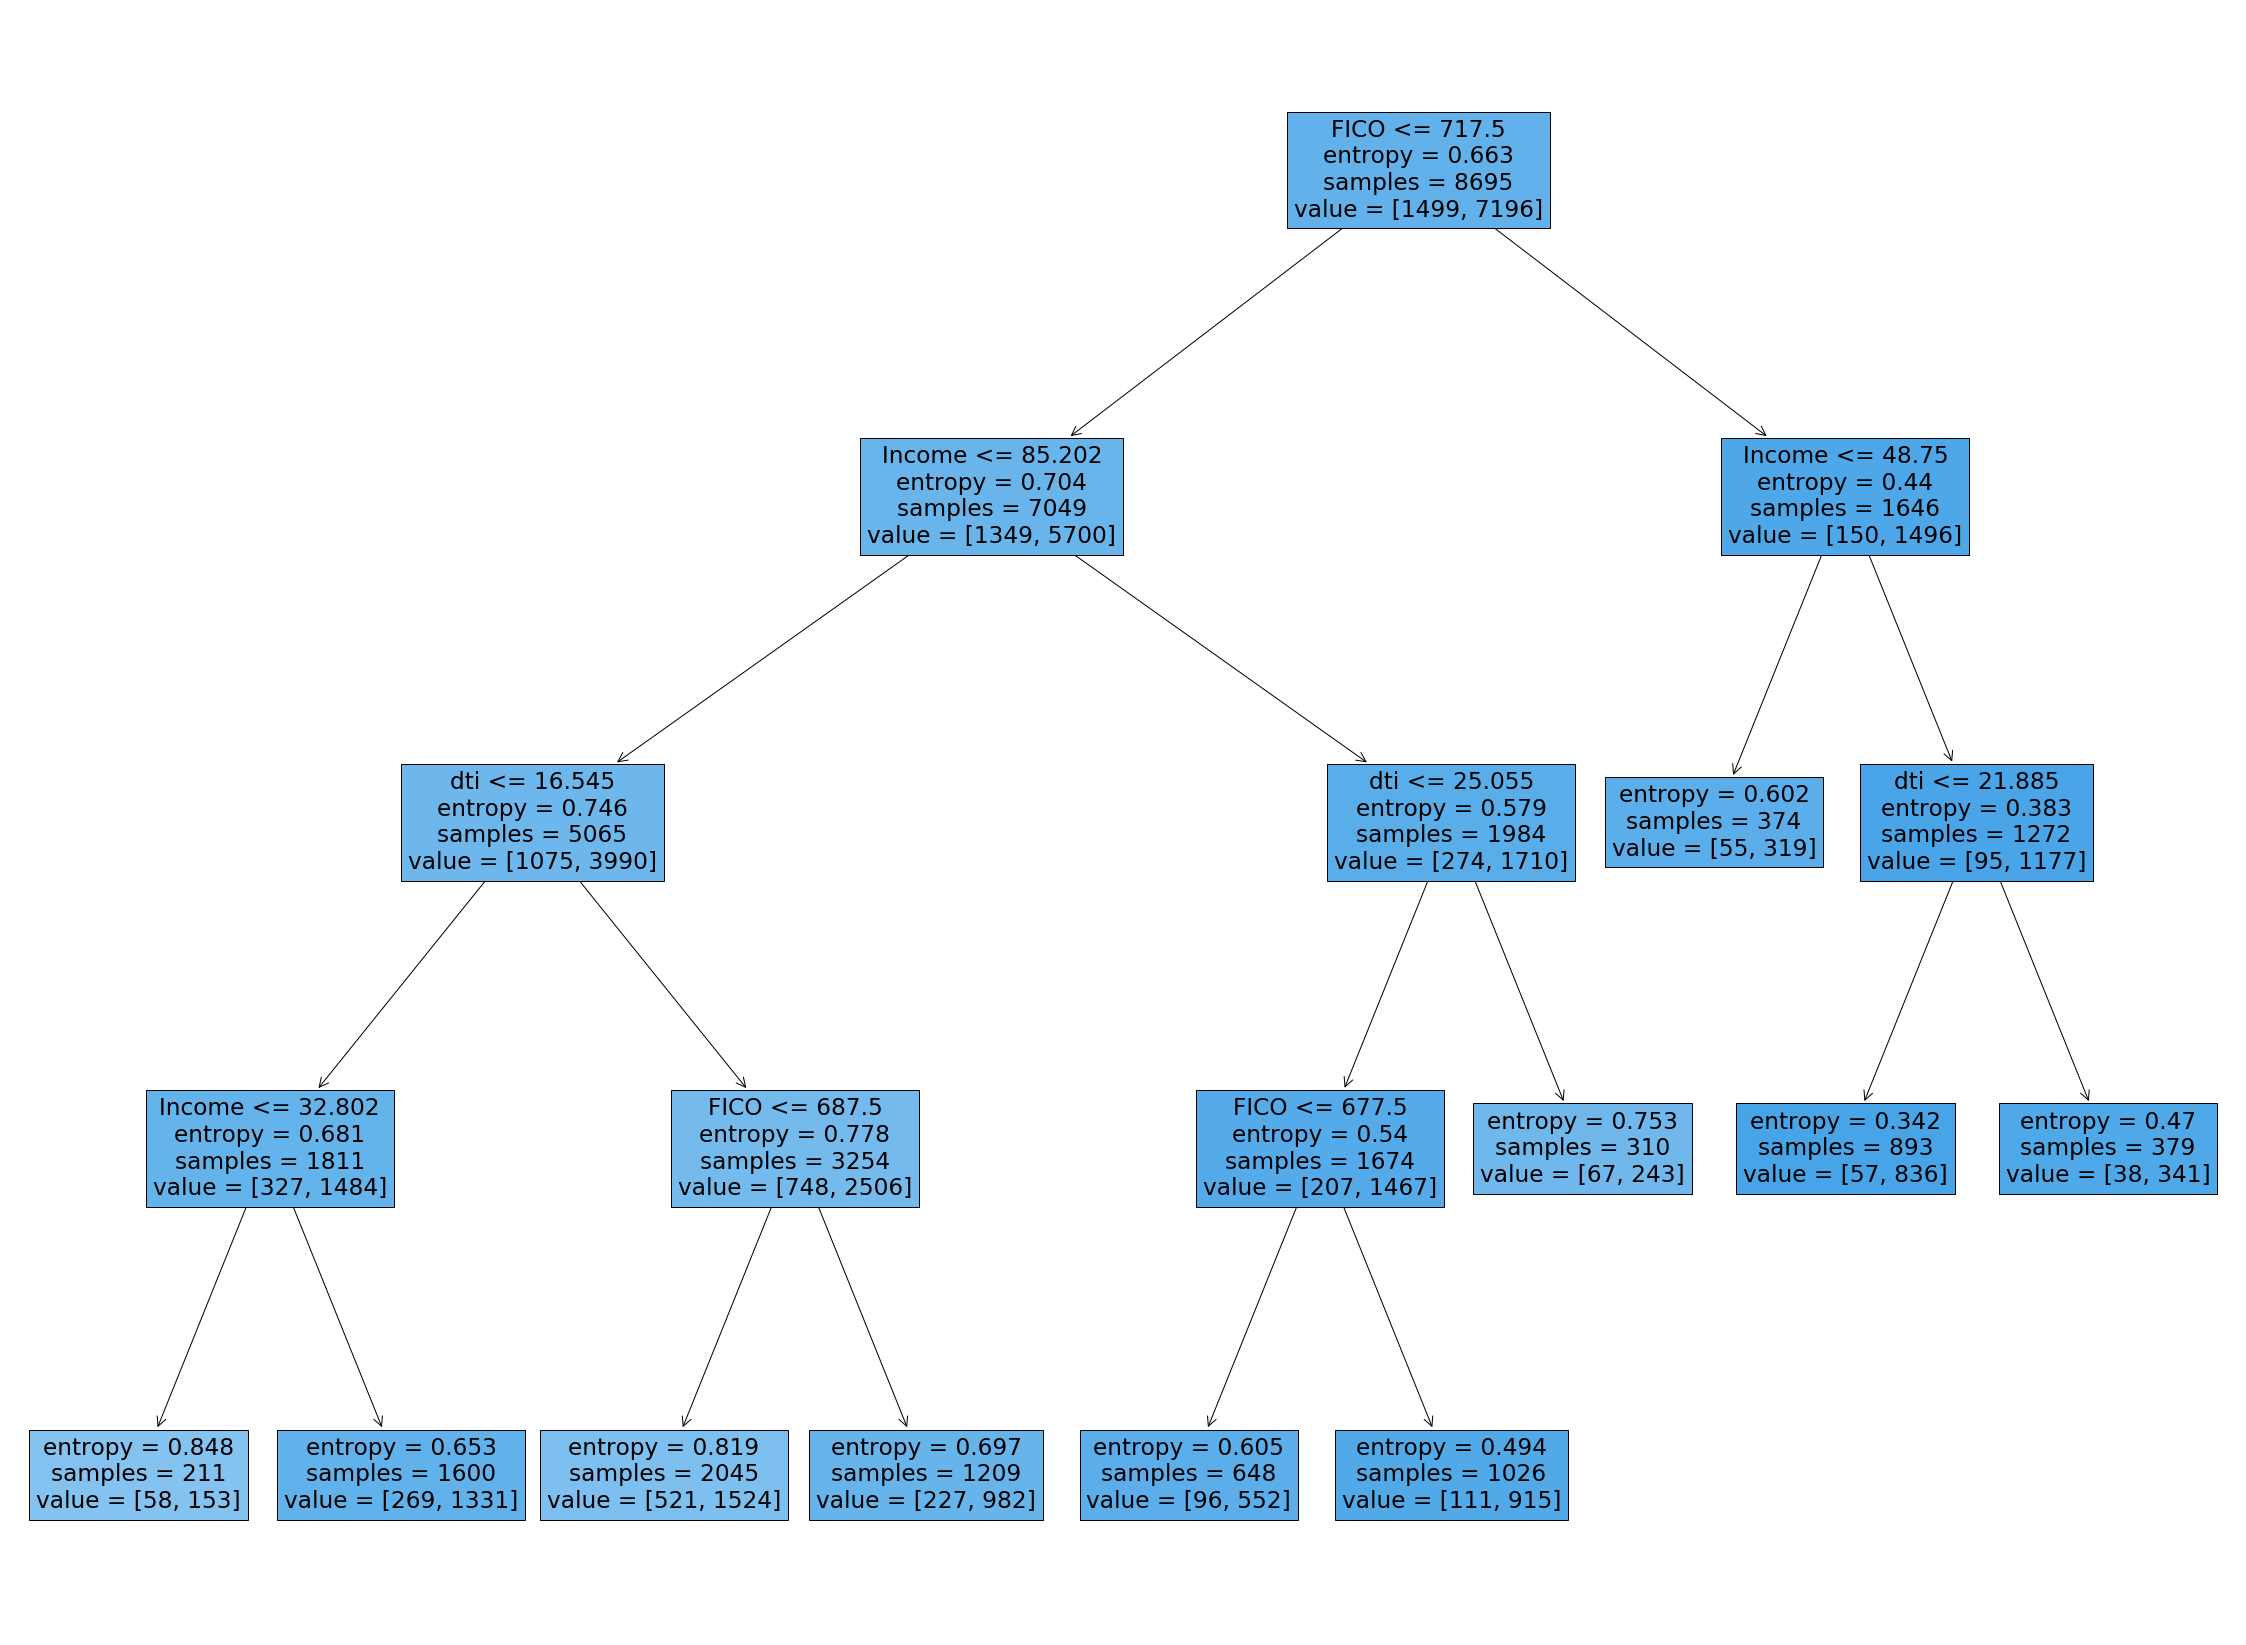

In [5]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=1000,min_samples_leaf=200,random_state=0)
clf = clf.fit(X,y)
fig, ax = plt.subplots(figsize=(40, 30))
plot_tree(clf, filled=True, feature_names=X.columns, proportion=False)
plt.show()

In [6]:
r = export_text(clf,feature_names=['Owns Home','Income','dti','FICO'])

In [7]:
print(r)

|--- FICO <= 717.50
|   |--- Income <= 85.20
|   |   |--- dti <= 16.55
|   |   |   |--- Income <= 32.80
|   |   |   |   |--- class: 1
|   |   |   |--- Income >  32.80
|   |   |   |   |--- class: 1
|   |   |--- dti >  16.55
|   |   |   |--- FICO <= 687.50
|   |   |   |   |--- class: 1
|   |   |   |--- FICO >  687.50
|   |   |   |   |--- class: 1
|   |--- Income >  85.20
|   |   |--- dti <= 25.05
|   |   |   |--- FICO <= 677.50
|   |   |   |   |--- class: 1
|   |   |   |--- FICO >  677.50
|   |   |   |   |--- class: 1
|   |   |--- dti >  25.05
|   |   |   |--- class: 1
|--- FICO >  717.50
|   |--- Income <= 48.75
|   |   |--- class: 1
|   |--- Income >  48.75
|   |   |--- dti <= 21.88
|   |   |   |--- class: 1
|   |   |--- dti >  21.88
|   |   |   |--- class: 1



In [8]:
test = pd.read_excel('lendingclub_testdata.xlsx')
# 1 = good, 0 = default
print(test.head())

   home_ownership  income    dti  fico_low  loan_status
0               1   127.0  10.94       675            0
1               1   197.0  15.64       710            0
2               1    25.5  28.75       670            0
3               1    80.0  20.16       660            0
4               0    57.0  30.60       675            0


In [9]:
# remove target column to create feature only dataset
X_test = test.drop('loan_status',axis=1)
# store target column
y_test = test['loan_status']
y_pred = clf.predict(X_test)

### Note that for the default prediciton (i.e., with threshold=0.5), it totally missed all the bad loans.

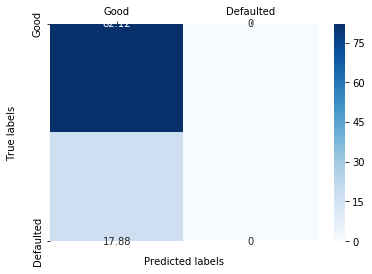

In [10]:
n_test = len(y_test)
cm = (confusion_matrix(y_test,y_pred,labels=[1, 0], sample_weight=None)/n_test)*100
plt.figure(figsize=(6, 4))      # format the plot size
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='.4g', cmap="Blues")
ax.set_xlabel('\nPredicted labels'); ax.set_ylabel('True labels\n')
ax.xaxis.tick_top()
ax.yaxis.set_ticklabels(['Good','Defaulted'],verticalalignment='center')
ax.xaxis.set_ticklabels(['Good','Defaulted'])
plt.show()

In [11]:
THRESHOLD = [.5, .75, .80, .85]
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "recall", "tnr", "fpr", "precision", "f1_score"]) # df to store results
results['THRESHOLD'] = THRESHOLD                                                                           # threshold column
n_test = len(y_test)
Q = clf.predict_proba(X_test)[:,1]
j = 0                                                                                                      
for i in THRESHOLD:                                                                                        # iterate over each threshold        
                                                                         # fit data to model
    preds = np.where(Q>i, 1, 0)                                       # if prob > threshold, predict 1
    
    cm = (confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None)/n_test)*100 
    # confusion matrix (in percentage)
    
    print('Confusion matrix for threshold =',i)
    print(cm)
    print(' ')      
    
    TP = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                          # True Negatives
    TN = cm[1][1]                                                                                          # False Negatives
        
    results.iloc[j,1] = accuracy_score(y_test, preds) 
    results.iloc[j,2] = recall_score(y_test, preds)
    results.iloc[j,3] = TN/(FP+TN)                                                                         # True negative rate
    results.iloc[j,4] = FP/(FP+TN)                                                                         # False positive rate
    results.iloc[j,5] = precision_score(y_test, preds)
    results.iloc[j,6] = f1_score(y_test, preds)
   
    j += 1

print('ALL METRICS')
print(results.T.to_string(header=False))

Confusion matrix for threshold = 0.5
[[82.11629479  0.        ]
 [17.88370521  0.        ]]
 
Confusion matrix for threshold = 0.75
[[62.42393509 19.6923597 ]
 [11.07167005  6.81203516]]
 
Confusion matrix for threshold = 0.8
[[59.46585531 22.65043949]
 [10.44624746  7.43745774]]
 
Confusion matrix for threshold = 0.85
[[32.15010142 49.96619337]
 [ 4.73292765 13.15077755]]
 
ALL METRICS
THRESHOLD       0.5      0.75       0.8      0.85
accuracy   0.821163   0.69236  0.669033  0.453009
recall            1  0.760189  0.724166  0.391519
tnr               0  0.380907  0.415879   0.73535
fpr               1  0.619093  0.584121   0.26465
precision  0.821163  0.849356   0.85058  0.871677
f1_score   0.901801  0.802303  0.782299  0.540341


In [12]:
# Compute the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, Q)
roc_auc = auc(fpr,tpr)

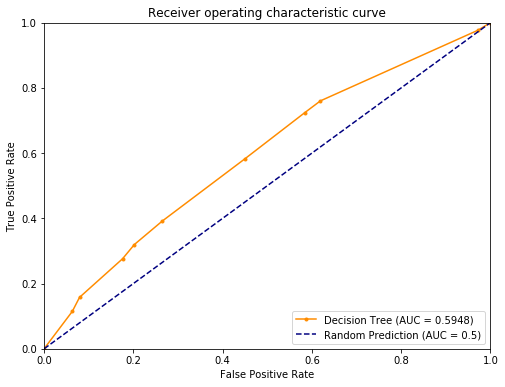

In [13]:
plt.figure(figsize=(8,6))      # format the plot size
lw = 1.5
plt.plot(fpr, tpr, color='darkorange', marker='.',
         lw=lw, label='Decision Tree (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--',
         label='Random Prediction (AUC = 0.5)' )
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()